# Lab 3

### Keira Hansen and Alex Foster

## Problem 1

### __(A)__

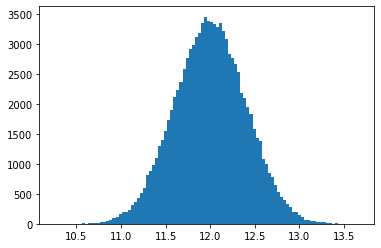

4.265σ
Original length of data = 100000
Size of kept data = 99999
Lower bound: 10.29404368243087
Upper bound: 13.705956317569537


In [101]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import special

dist = stats.norm.rvs(loc=12, scale=0.4, size=100000)
size = len(dist)

x = np.arange(10, 14, 0.1)
pdf = stats.norm.pdf(x, loc=12, scale=0.4)

np.append(dist, [10.0, 10.3, 2.1, 0.0, 0.0, 15.6, 22.3, 12.7])

plt.hist(dist, 100)
#plt.plot(x, pdf)
plt.show()

lower = stats.norm.ppf((1/100000), loc=12, scale=0.4)
upper = stats.norm.ppf((1 - 1/100000), loc=12, scale=0.4)


sorted_dist = dist.sort(axis=0)
i = 0
cut_dist = []
while dist[i] < lower:
    i += 1

while i < size and dist[i] <= upper:
    cut_dist.append(dist[i])
    i += 1

ppf = np.abs(stats.norm.ppf(1/100000)) 

print('%1.3f\u03C3' % ppf)

print("Original length of data = " + str(size))
print("Size of kept data = " + str(len(cut_dist)))

print("Lower bound: " + str(lower))
print("Upper bound: " + str(upper))


|     | True | False |
|-----|------|-------|
| pos | 99999/100000 | 0.25  | 
| neg | 1/100000    | 0.75  |

True-Positive: probability of keeping good data
True-Negative: probability of discarding good data
False-Positive: probability of keeping bad data
False-Negative: probability of discarding bad data

### __(B)__

### __(C)__

## Problem 2

## Problem 3